# California Housing Price Analisi

L'obbiettivo che ci poniamo è quello di predire il prezzo mediano di un block group riguardante immobili Californiani, ovvero un censimento redatto dall' US. Census Bereau nel 1990 corrispondente ad un'unità geografica del territorio. Un block group è composto da un numero di abitanti tipicamente compreso tra 600 e 3000 e contiene informazioni sugli immobili e sulla popolazione della zona.
Il dataset in questione è il "California Housing Data (1990)" ed è disponibile pubblicamente all'interno del famoso sito kaggle.com all'indirizzo: https://www.kaggle.com/harrywang/housing

E' così composto:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

Il target è una misura quantitativa del prezzo medio delle abitazioni contenute nel block group, indicato dalla colonna "medianHouseValue".

## Importo librerie e carico i dati

In [1]:
#Import librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import scipy as sp

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

#Dataset fonte: https://www.kaggle.com/harrywang/housing
housing = pd.read_csv('housing.csv')

# Analisi dei dati

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Visualizzo il datatype delle colonne e verifico quanti sono i valori non nulli

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nel dataset mancano 207 valori nella colonna "total_bedrooms", li sostituisco con una media dei dati

In [5]:
#inserisco la media dei "total_bedrooms" nei valori nulli
housing = housing.fillna(housing.total_bedrooms.mean())
housing.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Panoramica distribuzione dei valori

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualizzazione generale del nostro target. Notiamo una mediana inferiore ai 200.000 dollari e alcuni in zona 500.000

<AxesSubplot:>

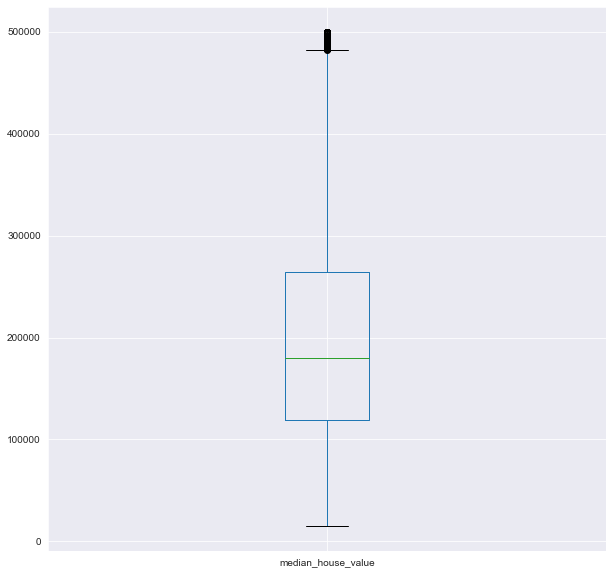

In [7]:
#boxplot del target
housing.boxplot(['median_house_value'], figsize=(10, 10))

Rilevo per ogni colonna quanti sono i valori originali. La colonna ocean_proximity ha 5 valori diversi e è di tipo oggetto, pertanto posso valorizzarla facendo una codifica one hot

In [8]:
#Unicità dei valori
columns = housing.columns
for col in columns:
    print(col, housing[col].nunique())

longitude 844
latitude 862
housing_median_age 52
total_rooms 5926
total_bedrooms 1924
population 3888
households 1815
median_income 12928
median_house_value 3842
ocean_proximity 5


Conto i dati per valore

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

e li visualizzo

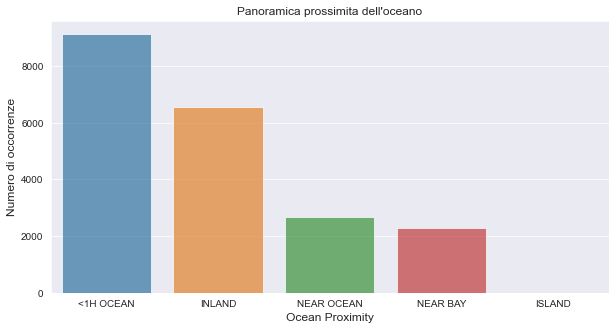

In [10]:
#Panoramica prossimita dell'oceano
op_count = housing['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title("Panoramica prossimita dell'oceano")
plt.ylabel('Numero di occorrenze', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

Visualizzo la distribuzione statistica dei valori del prezzo medio delle abitazioni in relazione alla prossimità del mare

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

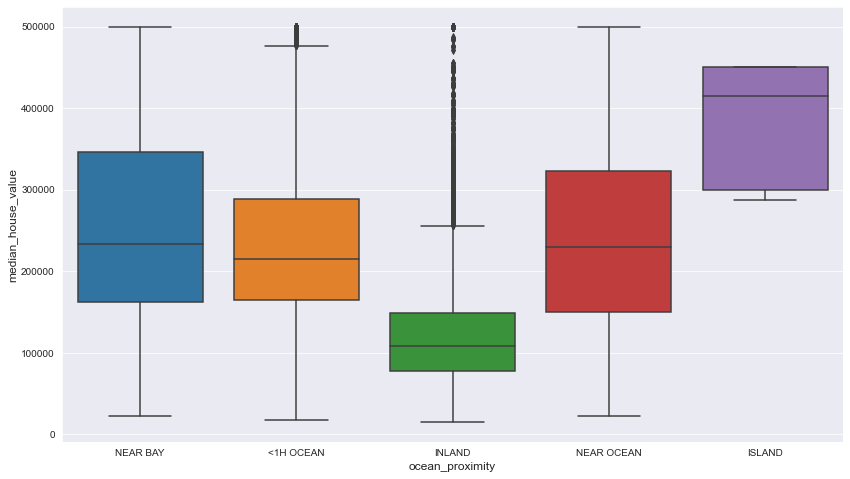

In [11]:
plt.figure(figsize=(14,8))
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
sns.boxplot(data=housing,x='ocean_proximity',y='median_house_value')

Visualizzo le distribuzioni delle varie features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

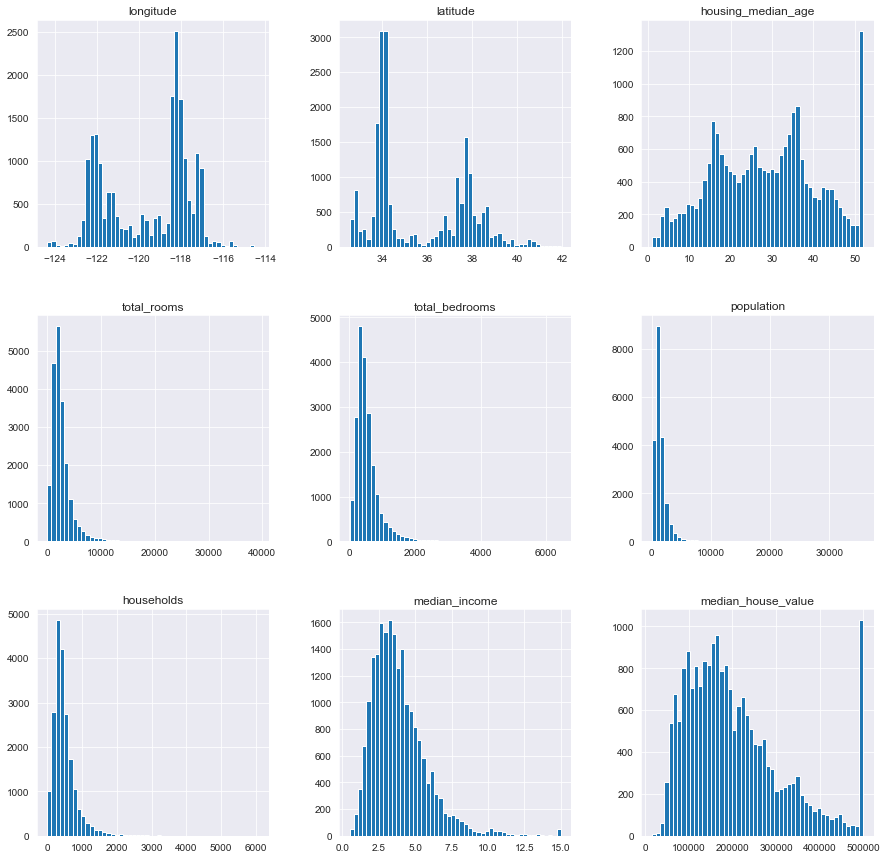

In [12]:
housing.hist(bins=50, figsize=(15, 15))

Partendo dalla feature "housing_median_age" notiamo come ha una distribuzione bivariata e presenta nei dati una anomalia in quanto è possibile notare come, superata la soglia dei 50, non vengono più tracciati in dettaglio gli anni, ma vengono raggruppati probabilmente in un range superiore che li comprende tutti.

"total_rooms", "total_bedrooms", "population", "households" e "median_income" sono abbastanza simili e presentano una distribuzione univariata e sbilanciata a destra.

La colonna del target invece ha una distribuzione bivariata con anch'essa una anomalia. Infatti come nel caso precedente, suparata la soglia di valore dei 500.000 dollari, i valori sono raggruppati in un unica soglia.

Inoltre, sfruttando le coordinate possiamo raffigurare graficamente una distribuzione del valore delle abitazioni rispetto all'entrate mediane

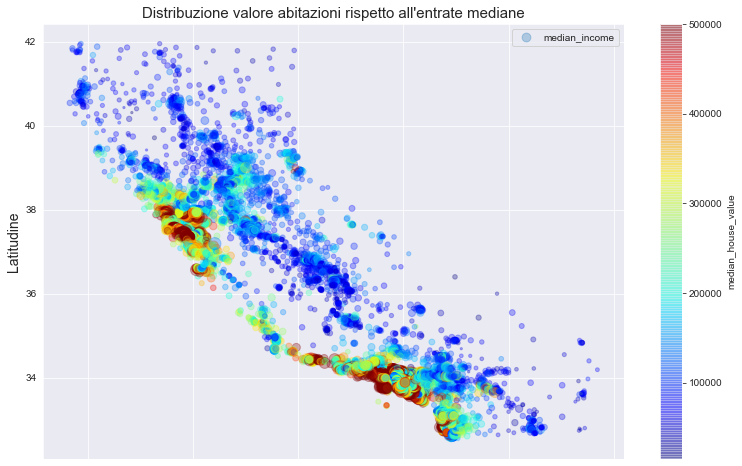

In [13]:
#Distribuzione valore delle case rispetto entrate mediane
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
s=housing['median_income']*10, label='median_income', figsize=(13,8),
c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.title("Distribuzione valore abitazioni rispetto all'entrate mediane", size = 15)
plt.ylabel("Latitudine", fontsize=14)
plt.xlabel("Longitudine", fontsize=14)
plt.legend() 
plt.show()

Notiamo subito come a ridosso della costa oceanica il valore medio delle abitazioni ha un prezzo superiore.

Analizzeremo ora in dettaglio tutte le correlazioni tra le varie features e il target "median_house_value", attraverso una heatmap.

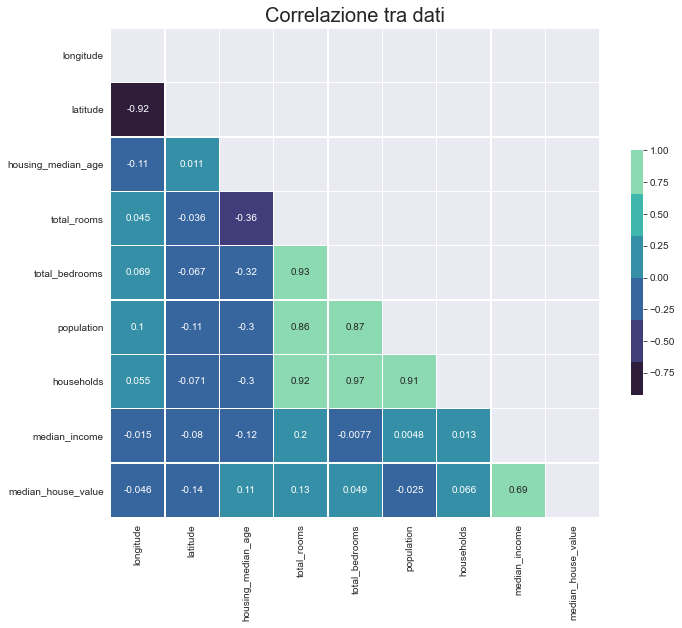

In [14]:
#Correlazione tra tutte le colonne
corr_matrix = housing.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap=sns.color_palette("mako")
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlazione tra dati', size=20);

Partendo dalle features rileviamo come fortemente correlata la colonna "total_rooms" con "total_bedrooms", come facilmente pronosticabile, unito anche a "population" e "households", mentre possiamo evidenziare una debole correlazione negativa anche nei valori della colonna "total_rooms" e "housing_median_age", che sta a significare che più l'età delle abitazioni è avanzata, meno stanze all'interno ci saranno.
Per quanto riguarda le features e il target, servendoci del codice nelle linee seguenti, riusciamo in dettaglio a rilevare il grado di correlazione, pertanto rimando a dopo le analisi.

In [15]:
#Correlazioni in ordine decrescente con "median_house_value"
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

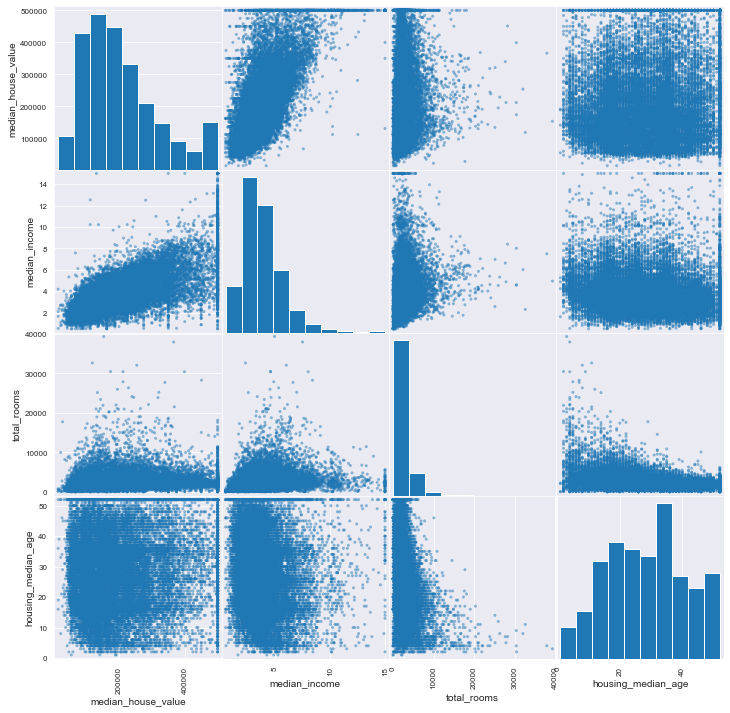

In [16]:
#Rappresentazione in dettaglio features correlate - target
from pandas.plotting import scatter_matrix
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[cols], figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

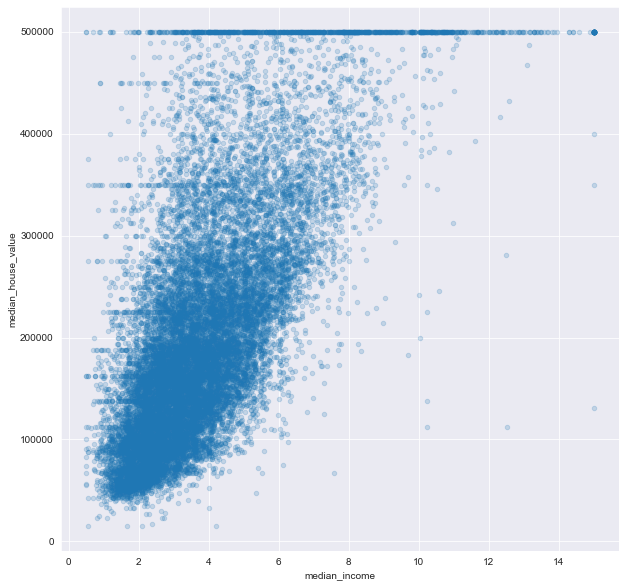

In [17]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

Ordinando per grado di correlazione le features, possiamo affermare come con il campo "median_income" abbiamo una forte correlazione positiva. Questo sta a significare che, come è normale che sia, con un reddito alto è possibile permettersi una casa dal valore più alto. Possiamo inoltre evidenziare delle correlazioni molto deboli con i campi "total_rooms" e "housing_median_age".

## Codifica One Hot

Effettuo la codifica One hot alla features "ocean_proximity" in quanto ha solo 5 valori diversi e non è di tipo float.


In [18]:
#Codifica one hot
housing= pd.get_dummies(housing, drop_first = True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


## Divido in training e test set

Divido il dataset in training e test set per poter addestrare e predire i valori del valore medio delle case

In [19]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_absolute_error

#Feature
X = housing.drop(columns='median_house_value')
#Target
y = housing['median_house_value']

print("Dataset: {}{}".format(X.shape,y.shape))

#Training (80%) e test (20%) set
X_train, X_test, y_train, y_test = split(X, y, test_size=.2, random_state = 42)

print("Training set:{}{}".format(X_train.shape,y_train.shape))
print("Testing set:{}".format(X_test.shape,y_test.shape))

Dataset: (20640, 12)(20640,)
Training set:(16512, 12)(16512,)
Testing set:(4128, 12)


# DecisionTreeRegressor

Costruisco un modello con il DecisionTreeRegressor utilizzando il GridSearchCV. Questa metodologia mi permette di provare tutte le combinazioni di parametri impostate, per poi selezionare i migliori per l'addestramento. Valuto in seguito le sue performance.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {"min_samples_split": [35,36,37,38,39,40,41,45,46],
              "max_depth": [14,15,16,18,20],
              "min_samples_leaf": [11,13,14,15,16,17,18],
              }

#Utilizzo i parametri "max_depth" perchè hanno influenza sulla varianza, mentre "min_samples_split" e "min_samples_leaf" perchè 
#ci permette di evitare di addestrare un modello che raggiunga una eccessiva profondità evitando l'overfitting
#9*5*7=315 combinazioni possibili

grid_cv_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, n_jobs=3, verbose=2)

#addestro il modello
grid_cv_dtr.fit(X_train,y_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=3,
             param_grid={'max_depth': [14, 15, 16, 18, 20],
                         'min_samples_leaf': [11, 13, 14, 15, 16, 17, 18],
                         'min_samples_split': [35, 36, 37, 38, 39, 40, 41, 45,
                                               46]},
             verbose=2)

In [21]:
#Creo dataset con tutte le combinazioni del GridSearchCV
result=pd.DataFrame(grid_cv_dtr.cv_results_) 

#Visualizzo i primi 5 risultati per punteggio
result[['param_min_samples_leaf','param_max_depth', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5]

,param_min_samples_leaf,param_max_depth,mean_test_score,rank_test_score
96,15,15,0.739609,1
92,15,15,0.739416,2
93,15,15,0.739296,3
91,15,15,0.739226,4
30,15,14,0.739202,5


In [22]:
print("R2: {}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters: {}".format(grid_cv_dtr.best_params_))

R2: 0.7396090386972414
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 41}


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [23]:
#Seleziono il modello con i parametri migliori
best_dtr_model = grid_cv_dtr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_dtr_model.predict(X_test)

#Calcolo R2 e MAE
r2_score = best_dtr_model.score(X_test,y_test)
MAE=mean_absolute_error(y_test,y_pred)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE DecisionTreeRegressor: %.2f" % MAE)
print('Errore relativo percentuale in relazione al valore medio delle case: {:.2f}%'.format(err_rel_dt))

R2: 0.7443817865369069
Media degli errori assoluta MAE DecisionTreeRegressor: 37808.76
Errore relativo percentuale in relazione al valore medio delle case: 18.40%


Il primo modello restituisce un risultato discreto in quanto abbiamo un R2 pari al 0.74%, con una media degli errori assoluta equivalente a 37808$ e un errore che si discosta dalla media del valore delle case di 18,40%.
Inoltre i tempi di addestramento, considerando il dataset molto popoloso, sono bassi.
Proviamo ora ad utilizzare il modello RandomForestRegressor.

# RandomForestRegressor

Anche con esso utilizzeremo la metodologia del GridSearchCV per selezionare i migliori parametri da assegnare al mostro modello più performante.

In [24]:
from sklearn.ensemble import RandomForestRegressor

param_grid ={'n_estimators':[50, 55, 60, 65, 70],
             'max_features': [4, 8, 9]}


#Utilizzo il parametro "max_features" perchè influisce sul bias degli alberi, mentre n_estimators, 
#a discapito della velocità, aumentandolo migliora le performance ed indica il numero di alberi da costruire.
#5*3= 15 combinazioni possibili

grid_cv_rfr = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=3), param_grid, cv = 3)
#addestro il modello
grid_cv_rfr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=3, random_state=42),
             param_grid={'max_features': [4, 8, 9],
                         'n_estimators': [50, 55, 60, 65, 70]})

In [25]:
#Creo dataset con tutte le combinazioni del GridSearchCV
result=pd.DataFrame(grid_cv_rfr.cv_results_)

#Visualizzo i primi 5 risultati per punteggio
result[['param_n_estimators', 'param_max_features', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5]

,param_n_estimators,param_max_features,mean_test_score,rank_test_score
8,65,8,0.814890,1
9,70,8,0.814812,2
7,60,8,0.814540,3
14,70,9,0.814476,4
13,65,9,0.814449,5


In [26]:
print("R2: {}".format(grid_cv_rfr.best_score_))
print("Best Hyperparameters: {}".format(grid_cv_rfr.best_params_))

R2: 0.8148900853860507
Best Hyperparameters: {'max_features': 8, 'n_estimators': 65}


## Valuto il test set

Addestrato il modello procedo con la valutazione delle performance nel dataset di test

In [27]:
#Seleziono il modello con i parametri migliori
best_rfr_model = grid_cv_rfr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_rfr_model.predict(X_test)

#Calcolo R2 e MAE
r2_score = best_rfr_model.score(X_test,y_test)
MAE=mean_absolute_error(y_test,y_pred)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE Random Forest Regressor: %.2f" % MAE)
print('Errore relativo percentuale in relazione al valore medio delle case: {:.2f}%'.format(err_rel_dt))

R2: 0.8189119614889544
Media degli errori assoluta MAE Random Forest Regressor: 31714.94
Errore relativo percentuale in relazione al valore medio delle case: 15.43%


Il secondo modello invece restituisce un risultato molto buono in quanto riusciamo a raggiungere un R2 pari a 0.82%, con una media degli errori assoluta equivalente a 31715$ e un errore che si discosta dalla media del valore delle case di 15.43%.
Anche in questo caso i tempi di addestramento considerando il dataset molto popoloso sono ottimi.
In ogni caso continueremo a ricercare modelli più performanti, andando anche ad intervenire sui dati.
Visti i buoni risultati analizziamo con dei grafici le predizioni

## Visualizzo predizione e valori reali

Attraverso la visualizzazione dei valori predetti con quelli reali possiamo rilevare aspetti che potrebbero indurci a fare ulteriori miglioramenti

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

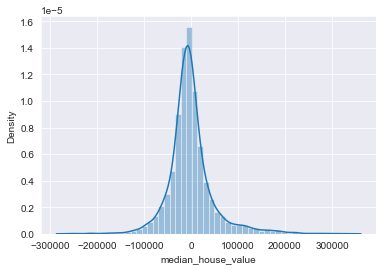

In [28]:
#Distribuzione discrepanza tra i valori predetti e i valori reali
sns.distplot(y_test-y_pred)

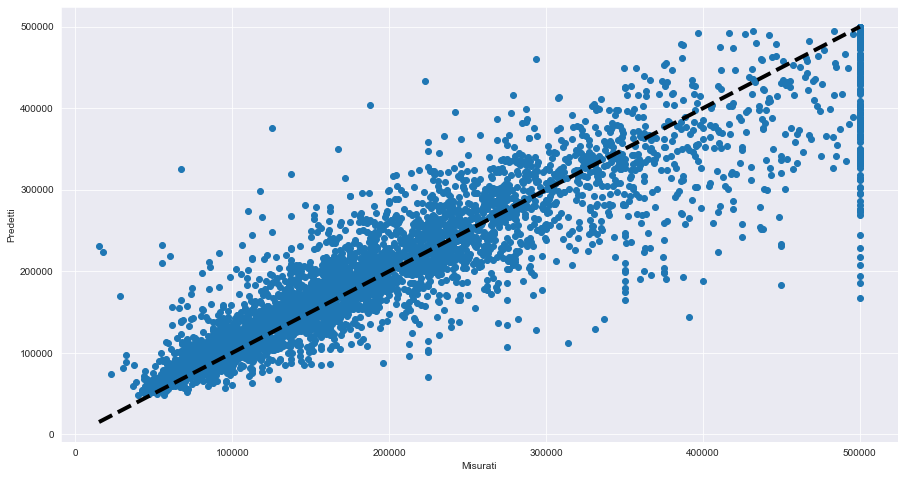

In [29]:
#Visualizzo i valori predetti e quelli del test set
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Misurati')
ax.set_ylabel('Predetti')
plt.show()

Notiamo come, salvo casi di errori estremi, partendo da valori bassi, le predizioni si discostano meno dalla realtà, mentre aumentando il valore delle abitazioni, l'errore inizia ad essere più importante. Nell'estrema destra balza subito all'occhio come la limitazione dei dataset verso valori oltre una certa soglia, sia invalidante per il nostro modello non consentendoci di realizzare addestramenti estremamente precisi.

# LinearRegression

Utilizziamo ora un modello di LinearRegression per addestrare i dati con la speranza che possa raggiungere performance superiori ai modelli precedenti. Il modello utilizza il dataset completo, senza una standardizzazione dei dati.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Addestro il modello
reg = LinearRegression().fit(X_train,y_train)

#Eseguo la predict utilizzando il dataset di test
prediction=reg.predict(X_test)

#Stampo R2 e MAE
print("R2 Square {:.2f}".format(r2_score(y_test,prediction)))
print("Errore medio assoluto MAE: {:.2f}".format(mean_absolute_error(y_test,prediction)))

R2 Square 0.63
Errore medio assoluto MAE: 50701.78


Le performance del modello nel dataset di test, rispetto ai modelli testati in precendenza, non sono soddisfacenti. L' R2 raggiunto è uguale a 0.63, mentre il MAE a 50701$. Non avendo parametri da validare abbandoniamo l'algoritmo e ci concentriamo su altri più adeguati al nostro dataset in questione.

## Scalatura dei dati per i modelli KneighborsRegressor e SVR

Per i modelli KneighborsRegressor e SVR occorre effettuare una scalatura dei dati in quanto essi non performano bene con valori che non sono tutti nella stessa scala di valutazione. La metodologia adottata utilizza il MinMaxScaler.

In [31]:
from sklearn.preprocessing import MinMaxScaler

#Utilizzo MinMaxScaler per effettuare la scalatura dei dati
scal = MinMaxScaler()

#Nuovo dataset
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

# KNeighborsRegressor

Andiamo ora a testare il KNeighborsRegressor. Anche in questo caso utilizzaremo il GridSearchCV

In [32]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'leaf_size' : [1,3,5,7,15,18,20,22,25,30,35,40],
              'n_neighbors' : [3,5,10,12,15,20,22,23,25,30,40],
              'weights': ['uniform','distance']
             }

#Utilizzo i parametri "n_neighbors" per selezionare la giusta quantità di valori dei "vicini" 
#da prendere in considerazione, mentre con "leaf_size" si regola la vicinanza di questi candidati e il 
#parametro "weights" invece assegna importanza diversa ai candidati in base alla loro distanza (distance)
#oppure in maniera uniforme (uniform)
#12*11*2=264 combinazioni possibili


grid_cv_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, cv=5, n_jobs=3, verbose=2)
#addestro il modello
grid_cv_knn.fit(X_train_scal, y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid={'leaf_size': [1, 3, 5, 7, 15, 18, 20, 22, 25, 30, 35,
                                       40],
                         'n_neighbors': [3, 5, 10, 12, 15, 20, 22, 23, 25, 30,
                                         40],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [33]:
#Creo dataset con tutte le combinazioni del GridSearchCV
result=pd.DataFrame(grid_cv_knn.cv_results_)  # metto in una tabella i 5 modelli che hanno ottenuto il risultato migliore

#Visualizzo i primi 5 risultati per punteggio
result[["param_n_neighbors", "param_leaf_size", "mean_test_score", "rank_test_score"]].sort_values(by=['rank_test_score']).iloc[:5]

,param_n_neighbors,param_leaf_size,mean_test_score,rank_test_score
27,10,3,0.71854,1
137,10,20,0.71854,1
181,10,25,0.71854,1
247,10,40,0.71854,1
5,10,1,0.71854,1


In [34]:
print("R2: {}".format(grid_cv_knn.best_score_))
print("Best Hyperparameters: {}".format(grid_cv_knn.best_params_))

R2: 0.7185398277537848
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}


## Valuto il test set

In [35]:
#Seleziono il modello con i parametri migliori
best_knn_model = grid_cv_knn.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_knn_model.predict(X_test_scal)

#Calcolo R2 e MAE
r2_score = best_knn_model.score(X_test_scal,y_test)
MAE=mean_absolute_error(y_test,y_pred)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE KNeighborsRegressor: %.2f" % MAE)
print('Errore relativo percentuale in relazione al valore medio delle case: {:.2f}%'.format(err_rel_dt))

R2: 0.7125887636623867
Media degli errori assoluta MAE KNeighborsRegressor: 40965.62
Errore relativo percentuale in relazione al valore medio delle case: 19.93%


Il KNeighborsRegressor restituisce un risultato discreto in quanto riusciamo a raggiungere un R2 pari al 0.71%, con una media degli errori assoluta equivalente a 40966$ e un errore che si discosta dalla media del valore delle case di 19.93%.
Anche in questo caso con un risultato discreto, i tempi di addestramento considerando il dataset molto popoloso sono ottimi, tuttavia il modello RandomForestRegressor risulta molto più accurato.
Procediamo ora con l'algoritmo Support Vector Regression (SVR)

# SVR

In questo caso per la scelta degli iperparametri adotteremo una metodologia simile al GridSearchCV, che prende il nome di RandomizedSearchCV. Questo algoritmo è molto utile quando abbiamo tanti parametri da provare e il tempo di addestramento è molto lungo, infatti invece di testare tutte le combinazioni ne seleziona in modo randomico un numero da noi impostato.

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': np.power(2, np.linspace(0, 4.5, 10).tolist()).tolist(),
             'C':np.power(10, np.linspace(-2, 4, 8).tolist()).tolist(),
             'epsilon' : np.power(2, np.linspace(-4, 1, 10).tolist()).tolist()}  

#Utilizzo C perché regola il grado di complessità della superficie separatrice (parametro regolarizzatore), gamma 
#perché influisce su quale sia il peso degli esempi ed epsilon perché rappresenta il margine in cui dati possono
#stare senza essere nominati errori.
#570 possili combinazioni, ma genero 190.

grid_cv_svr = RandomizedSearchCV(SVR(cache_size=1000, tol = 1e-5), param_distributions = param_grid, cv = 3, n_iter = 190, random_state=42, n_jobs = 3, verbose=2)
#addestro il modello
grid_cv_svr.fit(X_train_scal, y_train)

Fitting 3 folds for each of 190 candidates, totalling 570 fits


RandomizedSearchCV(cv=3, estimator=SVR(cache_size=1000, tol=1e-05), n_iter=190,
                   n_jobs=3,
                   param_distributions={'C': [0.01, 0.07196856730011521,
                                              0.517947467923121,
                                              3.727593720314938,
                                              26.826957952797247,
                                              193.06977288832496,
                                              1389.4954943731361, 10000.0],
                                        'epsilon': [0.0625, 0.09185840576722491,
                                                    0.13500746736153826,
                                                    0.19842513149602498,
                                                    0.2916322598940292,
                                                    0.4286219914265364,
                                                    0.6299605249474366,
                                     

In [37]:
#Creo dataset con tutte le combinazioni del GridSearchCV
result=pd.DataFrame(grid_cv_svr.cv_results_)

#Visualizzo i primi 5 risultati per punteggio
result[['param_gamma', 'mean_test_score','param_C', 'param_epsilon', 'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5]

,param_gamma,mean_test_score,param_C,param_epsilon,rank_test_score
177,8.0,0.684948,10000.0,0.198425,1
28,8.0,0.684948,10000.0,0.291632,2
153,8.0,0.684948,10000.0,0.925875,3
86,8.0,0.684948,10000.0,1.36079,4
38,8.0,0.684948,10000.0,2.0,5


## Valuto il test set

In [38]:
#Seleziono il modello con i parametri migliori
best_svr_model = grid_cv_svr.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_svr_model.predict(X_test_scal)

#Calcolo R2 e MAE
r2_score = best_svr_model.score(X_test_scal,y_test)
MAE=mean_absolute_error(y_test,y_pred)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE SVR %.2f" % MAE)
print('Errore relativo percentuale di {:.2f}% in relazione al valore medio delle case'.format(err_rel_dt))

R2: 0.6866468396873104
Media degli errori assoluta MAE SVR 41900.36
Errore relativo percentuale di 20.39% in relazione al valore medio delle case


Nonostante i tentativi e il lungo tempo di attesa per l'addestramento, dovuto al fatto che questo non è un'algoritmo adatto ad un grande set di dati, il modello SVR ha performance inferiori ai modelli testati precedentemente. Infatti restituisce un R2 pari al 0.69%, con una media degli errori assoluta equivalente a 41900$ e un errore che si discosta dalla media del valore delle case di 20.39%. Pertanto si è rivelato deludente sia per quanto riguarda il risultato che per la velocità di esecuzione.

## Considerazioni

Eseguiti i modelli di apprendimento DecisionTreeRegressor, RandomForestRegressor, LinearRegression, KneighborsRegressor e il SVR, abbiamo constatato come il modello più performante ed adeguato al nostro problema è il RFR che ha totalizzato un R2 di 0.8189119614889544, una media degli errori assoluta MAE di 31714.94 e un errore relativo percentuale in relazione al valore medio delle case di 15.43%
Andiamo ora ad effettuare alcuni tentativi di miglioramento del modello. Per prima cosa adotteremo un algoritrmo di rimozione degli outliers chiamato Z-Score e utilizzeremo il nuovo dataset per prevedere il prezzo medio delle case, successivamente andremo a selezionare anche le feature più importanti e correlate al target.

# Z-Score

Proviamo ora ad adottare una tecnica che potrebbe aiutarci ad eliminare alcuni outliers. L'algoritmo si chiama Z-Score ed è adatto a dati aventi una distribuzione normale. Anche se i nostri dati non sono del tutto idonei proviamo lo stesso e valutiamo le performance.
Questa metodoligia si basa su un concetto importante della statistica che prende anche il nome di standard score.
Questo punteggio aiuta a capire se un valore di dati è maggiore o minore della media e quanto si discosta da essa. In maniera più precisa ci dice a che distanza dalla media in deviazione standard ci troviamo per ogni dato.

Z score = (x - mean) / std. deviation

Una distribuzione normale:
- il 68% dei punti dei dati si trova tra +/- 1 deviazione standard.
- il 95% dei punti di dati si trova tra +/- 2 deviazioni standard
- il 99,7% dei punti di dati si trova tra +/- 3 deviazioni standardù

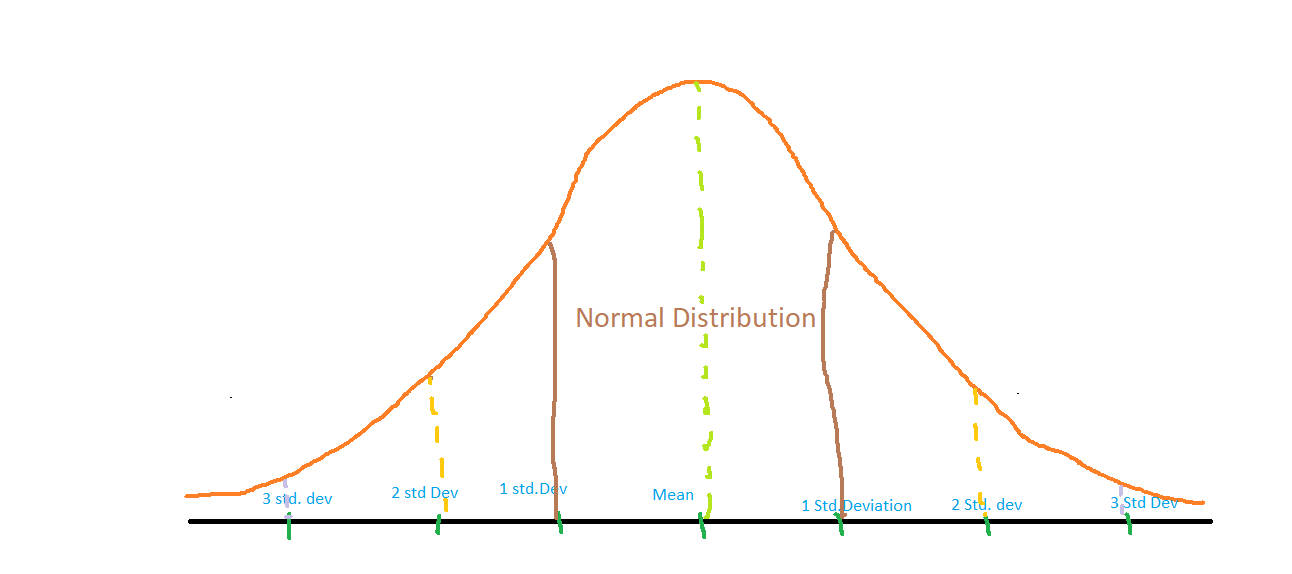

In [39]:
from IPython import display
display.Image("C:/Users/alial/Downloads/zscore.png")

In [40]:
from scipy import stats
import numpy as npz 

#calcola Z-Score
z =  np.abs(stats.zscore(housing)) 
print(z)

[[1.32783522 1.05254828 0.98214266 ... 0.01556621 2.83074203 0.38446649]
 [1.32284391 1.04318455 0.60701891 ... 0.01556621 2.83074203 0.38446649]
 [1.33282653 1.03850269 1.85618152 ... 0.01556621 2.83074203 0.38446649]
 ...
 [0.8237132  1.77823747 0.92485123 ... 0.01556621 0.35326426 0.38446649]
 [0.87362627 1.77823747 0.84539315 ... 0.01556621 0.35326426 0.38446649]
 [0.83369581 1.75014627 1.00430931 ... 0.01556621 0.35326426 0.38446649]]


In [41]:
#Livello di deviazione standard massimo accettato
threshold = 3
print(np.where(z > 3))

(array([   95,    95,   104, ..., 20629, 20629, 20629], dtype=int64), array([4, 6, 4, ..., 4, 5, 6], dtype=int64))


In [42]:
housing_out = housing.copy()
#seleziona solamente i dati minori di dev.stand. 3
housing_out = housing_out[(z < 3).all(axis=1)]
housing_out.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


Creato il nuovo dataset, andremo ora ad addestrare su di esso il modello RandomForestRegress per fare delle prove e vedere se riusciamo ad ottimizzare ancora di più le nostre performance a seguito della scrematura dei dati.

## Divido in training e test set utilizzando il database filtrato

In [43]:
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

#Feature
X_o = housing_out.drop(columns='median_house_value')
#Target
y_o = housing_out['median_house_value']

print("Dataset iniziale: {}{}".format(X.shape,y.shape))
print("Dataset dopo Z-Score: {}{}".format(X_o.shape,y_o.shape))

#Training (80%) e test (20%) set
X_train_o, X_test_o, y_train_o, y_test_o = split(X_o, y_o, test_size=.2, random_state = 42)

print("Training set:{}{}".format(X_train_o.shape,y_train_o.shape))
print("Testing set:{}{}".format(X_test_o.shape,y_test_o.shape))

Dataset iniziale: (20640, 12)(20640,)
Dataset dopo Z-Score: (19741, 12)(19741,)
Training set:(15792, 12)(15792,)
Testing set:(3949, 12)(3949,)


# RandomForestRegressor senza outliers

Eseguo il RandomForestRegressor e ricerco i parametri migliori tramite il GridSearchCV utilizzando il dataset filtrato

In [44]:
from sklearn.ensemble import RandomForestRegressor

param_grid ={'n_estimators':[50, 55, 60, 65, 70],
             'max_features': [4, 8, 9]}

grid_cv_rfr_o = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=3), param_grid, cv = 3)
#addestro il modello
grid_cv_rfr_o.fit(X_train_o, y_train_o)  # addestro il modello

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=3, random_state=42),
             param_grid={'max_features': [4, 8, 9],
                         'n_estimators': [50, 55, 60, 65, 70]})

In [45]:
#Creo dataset con tutte le combinazioni del GridSearchCV
result=pd.DataFrame(grid_cv_rfr_o.cv_results_)
#Visualizzo i primi 5 risultati per punteggio
result[['param_n_estimators', 'param_max_features', 'mean_test_score', 
        'rank_test_score']].sort_values(by=['rank_test_score']).iloc[:5]

,param_n_estimators,param_max_features,mean_test_score,rank_test_score
9,70,8,0.786046,1
14,70,9,0.785981,2
13,65,9,0.785960,3
4,70,4,0.785891,4
3,65,4,0.785806,5


In [46]:
print("R2: {}".format(grid_cv_rfr_o.best_score_))
print("Best Hyperparameters: {}".format(grid_cv_rfr_o.best_params_))

R2: 0.7860462751515715
Best Hyperparameters: {'max_features': 8, 'n_estimators': 70}


## Valuto il test set

In [47]:
#Seleziono il modello con i parametri migliori
best_rfr_model = grid_cv_rfr_o.best_estimator_

#Eseguo il predict ulizzando il dataset senza outliers
y_pred = best_rfr_model.predict(X_test_o)

#Calcolo R2 e MAE
MAE=mean_absolute_error(y_test_o,y_pred)
r2_score = best_rfr_model.score(X_test_o,y_test_o)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test_o.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE Random Forest Regressor senza outliers: %.2f" % MAE)
print('Errore relativo percentuale di {:.2f}% in relazione al valore medio delle case'.format(err_rel_dt))

R2: 0.8179556325730001
Media degli errori assoluta MAE Random Forest Regressor senza outliers: 31593.82
Errore relativo percentuale di 15.71% in relazione al valore medio delle case


I risultati ottenuti restituiscono delle performance leggermente inferiori rispetto la modello RandomForestRegressor utilizzando il dataset originale, tuttavia addestrando il modello con il dataset a seguito dello Z-Score ed effettuando la predict con i dati precedenti allo Z-Score si hanno performance nettamente superiori.

In [48]:
#Seleziono il modello con i parametri migliori
best_rfr_model = grid_cv_rfr_o.best_estimator_

#Eseguo il predict ulizzando il dataset di test
y_pred = best_rfr_model.predict(X_test)

#Calcolo R2 e MAE
MAE=mean_absolute_error(y_test,y_pred)
r2_score = best_rfr_model.score(X_test,y_test)

#Errore relativo percentuale basato sul valore medio delle abitazioni
err_rel_dt= MAE/(y_test.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE Random Forest Regressor senza outliers: %.2f" % MAE)
print('Errore relativo percentuale di {:.2f}% in relazione al valore medio delle case'.format(err_rel_dt))

R2: 0.9334014645418517
Media degli errori assoluta MAE Random Forest Regressor senza outliers: 17425.83
Errore relativo percentuale di 8.48% in relazione al valore medio delle case


Utilizzando il modello RandomForestRegressor con i dati ripuliti dall'algoritmo Z-Score e utilizzando il dataset originale come predizione e valutazione, abbiamo raggiunto un risultato sorprendente, risusciamo a raggiungere un R2 pari al 0.93%, con una media degli errori assoluta equivalente a 17425.83$ e un errore che si discosta dalla media del valore delle case di 8.48%. 
Visti i buoni risultati analizziamo con dei grafici le predizioni

## Visualizzo predizione e valori reali

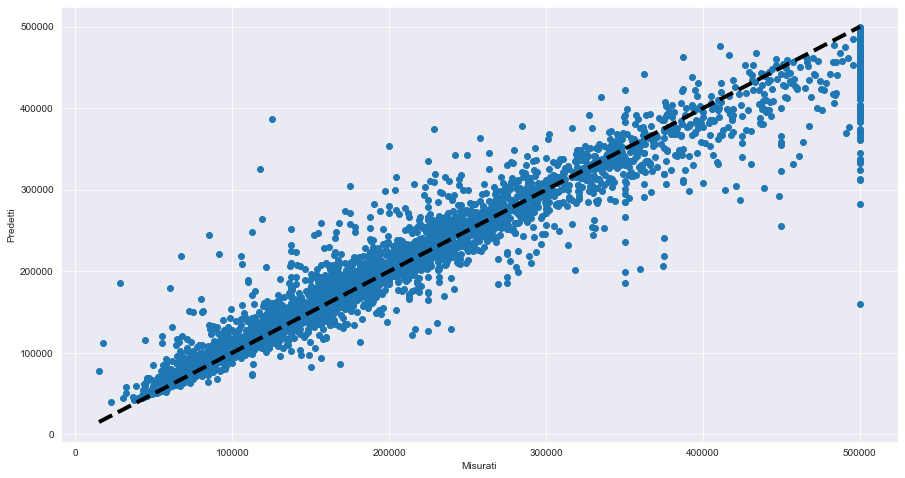

In [49]:
#visualizzo i valori predetti e quelli del test set
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Misurati')
ax.set_ylabel('Predetti')
plt.show()

Nell'analogo grafico visto in precedenza notavamo come il rumore, avendo uno score anche inferiore, fosse maggiore. In questo caso possiamo evidenziare come i risultati predetti rispecchiano più la realtà dei dati e per quanto riguarda gli outliers presenti nell'estrema destra del grafico sono significativamente più allineati, grazie all'ottimizzazione del dataset.

# Features selection utilizzando il RandomForestRegressor

Andiamo ora a filtrare ancora di più i nostri dati, escludendo dal database "ripulito" degli outliers, alcune features meno rilevanti alla risoluzione del modello.
Addestreremo ancora una volta il RandomForestRegressor per estrapolare le features più determinanti per poi, una volta prelevate, calcolare le performance.

In [50]:
#eseguo ancora una volta il fit per mostrare le feature più significative
best_rfr_model.fit(X_train_o, y_train_o)

RandomForestRegressor(max_features=8, n_estimators=70, n_jobs=3,
                      random_state=42)

In [51]:
#features più importanti sotto forma di vettore
print("Feature importances:")
best_rfr_model.feature_importances_

Feature importances:


array([0.12012735, 0.11726457, 0.0563855 , 0.03347663, 0.03079278,
       0.04238372, 0.02668117, 0.39706408, 0.16454205, 0.        ,
       0.00207087, 0.00921128])

(-1.0, 12.0)

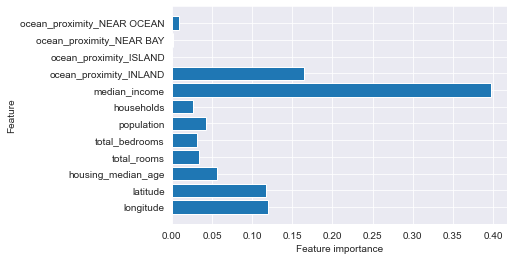

In [52]:
#features più importanti
n_features = X.shape[1]
plt.barh(np.arange(n_features), best_rfr_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns.tolist())
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

Notiamo come le features più utilizzate e caratterizzanti per questo modello sono: "latitude", "longitude", "ocean_proximity_INLAND" e "median_income", pertando proviamo ora ad escludere le restanti, tralasciando le feature di porccimità dell'oceano. Rimuoverò le features : 'households','total_bedrooms','total_rooms', 'population'

In [53]:
#Creo un modello RandomForestRegressor
model = RandomForestRegressor(max_features=5, n_estimators=70, random_state=42)

#Rimuovo features dal dateset filtrato
X_train_o_fs=X_train_o.drop(columns=['households','total_bedrooms','total_rooms', 'population'])

#Rimuovo features dal dateset filtrato
X_test_o_fs=X_test_o.copy()
X_test_o_fs.drop(columns=['households','total_bedrooms','total_rooms', 'population'],inplace=True)

## Addestro e valuto il test set

Eseguo l'addestramento, la predizione e la valutazione utilizzando il dataset senza outliers e senza features irrilevanti

In [54]:
#Addestro il modello e faccio il predict ulizzando il dataset di test filtrato e senza le feature meno importanti
prediction=model.fit(X_train_o_fs, y_train_o).predict(X_test_o_fs)

#Calcolo R2, MAE e l'errore relativo al valore medio delle abitazioni
r2_score = model.score(X_test_o_fs,y_test_o)
mae_rfr_fs = mean_absolute_error(y_test_o, prediction)
err_rel_rfr_fs= mae_rfr_fs/(y_test_o.mean())*100

print("R2: {}".format(r2_score))
print("Media degli errori assoluta MAE Random Forest Regressor feature selection: {:.2f} ".format(mae_rfr_fs))
print('Errore relativo percentuale in relazione al valore medio delle case: {:.2f}%'.format(err_rel_rfr_fs))

R2: 0.8197985703864222
Media degli errori assoluta MAE Random Forest Regressor feature selection: 30572.32 
Errore relativo percentuale in relazione al valore medio delle case: 15.20%


Il risultato ottenuto risulta analogo al modello iniziale utilizzando il dataset originario, pertanto il filtraggio dei dati e delle features con le metodologie utilizzate non risultano particolarmente convenienti.

# Features selection correlate al target attraverso la LinearRegression

Provo ora a rilanciare il modello della LinearRegression selezionando solamente le features che in fase di analisi dei dati erano risultate correlate al target.

In [55]:
#Seleziono le feature che mi interessano
cols = ['median_income', 'total_rooms', 'housing_median_age']

#Creo dataset solo con le features interessate
X_train_fs= X_train[cols]
X_test_fs= X_test[cols]

In [56]:
#Addestro il modello
reg = LinearRegression().fit(X_train_fs,y_train)

#Eseguo la predict utilizzando il dataset di test
prediction=reg.predict(X_test_fs)

#Stampo R2 e MAE 
r2_score = reg.score(X_test_fs,y_test)
print("R2: {}".format(r2_score))
print("L'errore medio assoluto MAE: {:.2f}".format(mean_absolute_error(y_test,prediction)))

R2: 0.4991503592397153
L'errore medio assoluto MAE: 60348.04


Anche in questo caso utilizzando la LinearRegression, servendosi delle sole features correlate al target, non siamo riusciti a raggiungere una efficacia sufficiente, totalizzando un R2 di 0.5 e un MAE di 60348$

# Conclusioni

## Risultati:

DecisionTreeRegression:
* R2: 0.74
* Media degli errori assoluta MAE DecisionTreeRegressor: 37808.76
* Errore relativo percentuale in relazione al valore medio delle case: 18.40%

RandomForestRegressor:
* R2: 0.82
* Media degli errori assoluta MAE Random Forest Regressor: 31714.94
* Errore relativo percentuale in relazione al valore medio delle case: 15.43%

LinearRegression:
* R2 Square 0.63
* Errore medio assoluto MAE: 50701.78

KneighborsRegressor:
* R2: 0.71
* Media degli errori assoluta MAE KNeighborsRegressor: 40965.62
* Errore relativo percentuale in relazione al valore medio delle case: 19.93%

SVR:
* R2: 0.69
* Media degli errori assoluta MAE KNeighborsRegressor: 41900,12
* Errore relativo percentuale in relazione al valore medio delle case: 20.39%

RandomForestRegressor senza outliers:
* R2: 0.82
* Media degli errori assoluta MAE Random Forest Regressor senza outliers: 31593.82
* Errore relativo percentuale di 15.71% in relazione al valore medio delle case

RandomForestRegressor senza outliers (test set originale):
* R2: 0.93
* Media degli errori assoluta MAE Random Forest Regressor senza outliers: 17425.83
* Errore relativo percentuale di 8.48% in relazione al valore medio delle case

Features selection RandomForestRegressor:
* R2: 0.82
* Media degli errori assoluta MAE Random Forest Regressor feature selection: 30572.32 
* Errore relativo percentuale in relazione al valore medio delle case: 15.20%

Features selection correlate target LinearRegression:
* R2: 0.5
* L'errore medio assoluto MAE: 60348.04

## Considerazioni finali

Avendo analizzato alcuni algoritmi di machine learning adatti a risolvere problemi di regressione siamo in grado ora di selezionare il modello più adatto al nostro problema.
Partendo dal dataset originale abbiamo constatato che il modello migliore è risultato essere il RandomForestRegress in quanto ha totalizzato dei risultati considerevolmente superiori agli altri provati.
Inoltre prendendo questo algoritmo come modello, ho provato ad effettuare alcune prove sui dati cercando di arginare i limiti rilevati nell'analisi. Le prove riguardano l'utilizzo di un algoritmo che ci permette di eliminare gli outliers, oppure la selezione delle feature più correlate al target.
Nel primo caso utilizzando il RandomForestRegressor e servendosi del test set per eseguire la predizione e la valutazione, abbiamo raggiunto una performance superiore ai risultati ricevuti precedentemente, mentre nel secondo caso , la prova non ha restituito i risultati sperati in quanto con il RFR abbiamo raggiunto un risultato analogo a quelli precendenti, mentre con una LinearRegression addirittura inferiori.